# 안녕하세요^^ 
## AIVLE 2차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정 4번 파일입니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

## [프로젝트 흐름]

0.튜토리얼에서 주민등록 데이터를 함께 전처리/체험 해 봅니다.

1.서울시 버스 정류장 데이터를 전처리/분석 합니다.

2.서울시 유동인구 데이터를 전처리/분석 합니다.

3.서울시 주민등록 데이터를 전처리/분석 합니다.

### 4.서울시 업종등록 데이터를 전처리/분석 합니다.

5.위 4개 데이터를 합쳐서 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구별 업종 등록 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 기본전제
* 처음에 제공되는 기본/추가 데이터는 'raw_data' 폴더에 있습니다.

[기본 데이터]
* 1.3 업종등록 데이터.csv

[데이터 소개]
* 서울 시 구별 등록 업종 상위 10개 데이터
    * 택시운송업
    * 한식일반음식점업
    * 용달 화물자동차 운송업
    * 부동산 중개 및 대리업
    * 두발미용업
    * 커피전문점
    * 남녀용 겉옷 및 셔츠 도매업
    * 기타주점업
    * 일반 교과 학원
    * 한식 육류요리 전문점

[변수 소개]
* 다수 업종 상위 1~10

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* '1.3 업종등록 데이터.csv'파일을 'seoul_business' 변수에 저장하고 그 데이터를 확인하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
import pandas as pd
seoul_business = pd.read_csv('rawdata/1.3 업종등록 데이터.csv',sep = ',', encoding = 'UTF-8')

In [3]:
# 데이터 프레임의 Shape을 확인합니다.
seoul_business.shape

(451, 22)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_business' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.describe()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
count,451,451,451,451,451,451,451,451,451,451,...,451,451,451,451,451,451,451,451,451,451
unique,27,425,226,280,176,305,177,180,142,205,...,131,239,69,147,127,189,113,222,107,230
top,송파구,소계,71,11,24,104,56,56,40,54,...,13,16,-,-,18,20,4,42,17,45
freq,28,25,7,7,11,6,8,9,11,9,...,18,8,82,82,14,10,15,10,16,9


In [5]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   자치구           451 non-null    object
 1   동             451 non-null    object
 2   다수업종 상위10     451 non-null    object
 3   다수업종 상위10.1   451 non-null    object
 4   다수업종 상위10.2   451 non-null    object
 5   다수업종 상위10.3   451 non-null    object
 6   다수업종 상위10.4   451 non-null    object
 7   다수업종 상위10.5   451 non-null    object
 8   다수업종 상위10.6   451 non-null    object
 9   다수업종 상위10.7   451 non-null    object
 10  다수업종 상위10.8   451 non-null    object
 11  다수업종 상위10.9   451 non-null    object
 12  다수업종 상위10.10  451 non-null    object
 13  다수업종 상위10.11  451 non-null    object
 14  다수업종 상위10.12  451 non-null    object
 15  다수업종 상위10.13  451 non-null    object
 16  다수업종 상위10.14  451 non-null    object
 17  다수업종 상위10.15  451 non-null    object
 18  다수업종 상위10.16  451 non-null    object
 19  다수업종 상위1

In [6]:
# 상위 20개

In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.head(10)

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
0,자치구,동,택시운송업,택시운송업,한식 일반 음식점업,한식 일반 음식점업,용달 화물자동차 운송업,용달 화물자동차 운송업,부동산 중개 및 대리업,부동산 중개 및 대리업,...,커피전문점,커피전문점,남녀용 겉옷 및 셔츠 도매업,남녀용 겉옷 및 셔츠 도매업,기타주점업,기타주점업,일반 교과 학원,일반 교과 학원,한식 육류요리 전문점,한식 육류요리 전문점
1,자치구,동,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,...,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수,사업체수,종사자수
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636",...,"16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,...,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
4,종로구,사직동,7,7,230,982,12,12,57,96,...,124,525,2,18,74,177,9,34,45,220
5,종로구,삼청동,5,5,42,145,4,4,9,10,...,66,243,2,3,3,8,-,-,7,33
6,종로구,부암동,22,22,26,100,9,9,17,26,...,24,62,3,6,7,23,16,59,3,15
7,종로구,평창동,10,10,31,116,11,11,33,52,...,19,62,2,4,26,54,25,71,10,103
8,종로구,무악동,10,10,10,26,410,416,12,17,...,7,15,-,-,-,-,14,50,1,2
9,종로구,교남동,14,14,14,44,7,7,26,37,...,13,55,-,-,1,1,5,22,3,15


#### [실습문제3] 데이터 확인 및 처리

* head 와 tail 을 보았을때, 어느 데이터만 가져와야 할지 생각 해 봅시다.

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business_copy = seoul_business.copy()
seoul_business = seoul_business.drop('동', axis = 1)

In [9]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_business.tail()

,자치구,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,...,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
446,강동구,120,120,135,390,73,73,104,163,83,...,54,133,10,86,57,103,66,199,44,164
447,강동구,117,436,63,249,89,89,61,108,62,...,34,85,10,788,21,39,35,90,24,101
448,강동구,209,372,71,195,153,153,67,107,82,...,29,59,3,6,47,98,31,67,34,98
449,강동구,157,187,152,509,144,151,97,188,83,...,63,212,4,17,95,268,24,42,69,245
450,강동구,"1,441","1,557",152,436,217,225,146,237,121,...,71,228,6,126,122,294,39,136,70,224


In [10]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [11]:
# 해당 데이터프레임을 'df_seoul_business.csv' 파일로 저장하세요.
seoul_business.to_csv('df_seoul_business.csv')

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [12]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [13]:
pd.set_option('display.max_columns', None)

#### [실습문제4] 데이터 분포 알아보기_1
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [14]:
seoul_business_copy = seoul_business_copy[(seoul_business_copy['동'] == '합계') | (seoul_business_copy['동'] == '소계')]
seoul_business_copy.head()

,자치구,동,다수업종 상위10,다수업종 상위10.1,다수업종 상위10.2,다수업종 상위10.3,다수업종 상위10.4,다수업종 상위10.5,다수업종 상위10.6,다수업종 상위10.7,다수업종 상위10.8,다수업종 상위10.9,다수업종 상위10.10,다수업종 상위10.11,다수업종 상위10.12,다수업종 상위10.13,다수업종 상위10.14,다수업종 상위10.15,다수업종 상위10.16,다수업종 상위10.17,다수업종 상위10.18,다수업종 상위10.19
2,합계,합계,"47,176","76,701","29,225","100,183","28,494","29,356","24,013","42,636","18,080","36,214","16,255","57,322","13,388","51,116","13,339","31,371","11,911","50,773","11,109","44,653"
3,종로구,소계,215,215,"1,548","5,912",618,646,549,889,261,480,948,"3,613",400,962,537,"1,413",110,382,437,"1,982"
21,중구,소계,230,235,"1,588","6,414",300,333,576,"1,152",339,816,869,"3,542","10,810","24,248",381,982,57,175,443,"2,121"
37,용산구,소계,416,523,857,"2,987",455,466,791,"1,214",366,777,634,"2,076",54,317,487,"1,332",104,573,300,"1,184"
54,성동구,소계,"1,200","2,527",956,"2,785","1,072","1,161",801,"1,453",489,851,547,"1,859",149,"1,572",285,621,258,"1,494",400,"1,545"


In [15]:
seoul_business_copy.set_index('자치구', inplace = True)

In [16]:
seoul_business_copy.drop('동', axis = 1, inplace = True)

In [17]:
for i in seoul_business_copy.columns:
    seoul_business_copy[i] = seoul_business_copy[i].str.replace(',','') #.1이면 종사자, 아니면 사업체
    seoul_business_copy[i] = seoul_business_copy[i].str.replace('-','0')
    seoul_business_copy[i] = seoul_business_copy[i].astype('int')

In [18]:
seoul_business_copy.columns = ['택시운송업 - 사업체','택시운송업 - 종사자',	'한식 일반 음식점업 - 사업체',	'한식 일반 음식점업 - 종사자',
                               '용달 화물자동차 운송업 - 사업체',	'용달 화물자동차 운송업 - 종사자',	'부동산 중개 및 대리업 - 사업체',	'부동산 중개 및 대리업 - 종사자',
                               '두발미용업 - 사업체',	'두발미용업 - 종사자',	'커피전문점 - 사업체',	'커피전문점 - 종사자',	'남녀용 겉옷 및 셔츠 도매업 - 사업체',	
                               '남녀용 겉옷 및 셔츠 도매업 - 종사자',	'기타주점업 - 사업체',	'기타주점업 - 종사자',	'일반 교과 학원 - 사업체',	'일반 교과 학원 - 종사자',
                               '한식 육류요리 전문점 - 사업체',	'한식 육류요리 전문점 - 종사자']

In [19]:
seoul_business_copy.head()

,택시운송업 - 사업체,택시운송업 - 종사자,한식 일반 음식점업 - 사업체,한식 일반 음식점업 - 종사자,용달 화물자동차 운송업 - 사업체,용달 화물자동차 운송업 - 종사자,부동산 중개 및 대리업 - 사업체,부동산 중개 및 대리업 - 종사자,두발미용업 - 사업체,두발미용업 - 종사자,커피전문점 - 사업체,커피전문점 - 종사자,남녀용 겉옷 및 셔츠 도매업 - 사업체,남녀용 겉옷 및 셔츠 도매업 - 종사자,기타주점업 - 사업체,기타주점업 - 종사자,일반 교과 학원 - 사업체,일반 교과 학원 - 종사자,한식 육류요리 전문점 - 사업체,한식 육류요리 전문점 - 종사자
자치구,,,,,,,,,,,,,,,,,,,,
합계,47176,76701,29225,100183,28494,29356,24013,42636,18080,36214,16255,57322,13388,51116,13339,31371,11911,50773,11109,44653
종로구,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982
중구,230,235,1588,6414,300,333,576,1152,339,816,869,3542,10810,24248,381,982,57,175,443,2121
용산구,416,523,857,2987,455,466,791,1214,366,777,634,2076,54,317,487,1332,104,573,300,1184
성동구,1200,2527,956,2785,1072,1161,801,1453,489,851,547,1859,149,1572,285,621,258,1494,400,1545


In [20]:
seoul_business_copy.reset_index(drop = False, inplace = True)

In [21]:
seoul_business_copy.head(2)

,자치구,택시운송업 - 사업체,택시운송업 - 종사자,한식 일반 음식점업 - 사업체,한식 일반 음식점업 - 종사자,용달 화물자동차 운송업 - 사업체,용달 화물자동차 운송업 - 종사자,부동산 중개 및 대리업 - 사업체,부동산 중개 및 대리업 - 종사자,두발미용업 - 사업체,두발미용업 - 종사자,커피전문점 - 사업체,커피전문점 - 종사자,남녀용 겉옷 및 셔츠 도매업 - 사업체,남녀용 겉옷 및 셔츠 도매업 - 종사자,기타주점업 - 사업체,기타주점업 - 종사자,일반 교과 학원 - 사업체,일반 교과 학원 - 종사자,한식 육류요리 전문점 - 사업체,한식 육류요리 전문점 - 종사자
0,합계,47176,76701,29225,100183,28494,29356,24013,42636,18080,36214,16255,57322,13388,51116,13339,31371,11911,50773,11109,44653
1,종로구,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982


In [22]:
seoul_business_copy['택시운송업 - 사업체'] = seoul_business_copy['택시운송업 - 사업체'] / seoul_business_copy['택시운송업 - 사업체'][0] * 100
seoul_business_copy['택시운송업 - 종사자'] = seoul_business_copy['택시운송업 - 종사자'] / seoul_business_copy['택시운송업 - 종사자'][0] * 100
seoul_business_copy['한식 일반 음식점업 - 사업체'] = seoul_business_copy['한식 일반 음식점업 - 사업체'] / seoul_business_copy['한식 일반 음식점업 - 사업체'][0] * 100
seoul_business_copy['한식 일반 음식점업 - 종사자'] = seoul_business_copy['한식 일반 음식점업 - 종사자'] / seoul_business_copy['한식 일반 음식점업 - 종사자'][0] * 100
seoul_business_copy['부동산 중개 및 대리업 - 사업체'] = seoul_business_copy['부동산 중개 및 대리업 - 사업체'] / seoul_business_copy['부동산 중개 및 대리업 - 사업체'][0] * 100
seoul_business_copy['부동산 중개 및 대리업 - 종사자'] = seoul_business_copy['부동산 중개 및 대리업 - 종사자'] / seoul_business_copy['부동산 중개 및 대리업 - 종사자'][0] * 100
seoul_business_copy['용달 화물자동차 운송업 - 사업체'] = seoul_business_copy['용달 화물자동차 운송업 - 사업체'] / seoul_business_copy['용달 화물자동차 운송업 - 사업체'][0] * 100
seoul_business_copy['용달 화물자동차 운송업 - 종사자'] = seoul_business_copy['용달 화물자동차 운송업 - 종사자'] / seoul_business_copy['용달 화물자동차 운송업 - 종사자'][0] * 100
seoul_business_copy['두발미용업 - 사업체'] = seoul_business_copy['두발미용업 - 사업체'] / seoul_business_copy['두발미용업 - 사업체'][0] * 100
seoul_business_copy['두발미용업 - 종사자'] = seoul_business_copy['두발미용업 - 종사자'] / seoul_business_copy['두발미용업 - 종사자'][0] * 100
seoul_business_copy['커피전문점 - 사업체'] = seoul_business_copy['커피전문점 - 사업체'] / seoul_business_copy['커피전문점 - 사업체'][0] * 100
seoul_business_copy['커피전문점 - 종사자'] = seoul_business_copy['커피전문점 - 종사자'] / seoul_business_copy['커피전문점 - 종사자'][0] * 100
seoul_business_copy['기타주점업 - 사업체'] = seoul_business_copy['기타주점업 - 사업체'] / seoul_business_copy['기타주점업 - 사업체'][0] * 100
seoul_business_copy['기타주점업 - 사업체'] = seoul_business_copy['기타주점업 - 종사자'] / seoul_business_copy['기타주점업 - 종사자'][0] * 100
seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'] = seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'] / seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'][0] * 100
seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'] = seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'] / seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'][0] * 100
seoul_business_copy['일반 교과 학원 - 사업체'] = seoul_business_copy['일반 교과 학원 - 사업체'] / seoul_business_copy['일반 교과 학원 - 사업체'][0] * 100
seoul_business_copy['일반 교과 학원 - 종사자'] = seoul_business_copy['일반 교과 학원 - 종사자'] / seoul_business_copy['일반 교과 학원 - 종사자'][0] * 100
seoul_business_copy['한식 육류요리 전문점 - 사업체'] = seoul_business_copy['한식 육류요리 전문점 - 사업체'] / seoul_business_copy['한식 육류요리 전문점 - 사업체'][0] * 100
seoul_business_copy['한식 육류요리 전문점 - 종사자'] = seoul_business_copy['한식 육류요리 전문점 - 종사자'] / seoul_business_copy['한식 육류요리 전문점 - 종사자'][0] * 100

In [23]:
seoul_business_copy.drop(index = 0,axis = 0,inplace = True)

In [24]:
seoul_business_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 1 to 25
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   자치구                    25 non-null     object 
 1   택시운송업 - 사업체            25 non-null     float64
 2   택시운송업 - 종사자            25 non-null     float64
 3   한식 일반 음식점업 - 사업체       25 non-null     float64
 4   한식 일반 음식점업 - 종사자       25 non-null     float64
 5   용달 화물자동차 운송업 - 사업체     25 non-null     float64
 6   용달 화물자동차 운송업 - 종사자     25 non-null     float64
 7   부동산 중개 및 대리업 - 사업체     25 non-null     float64
 8   부동산 중개 및 대리업 - 종사자     25 non-null     float64
 9   두발미용업 - 사업체            25 non-null     float64
 10  두발미용업 - 종사자            25 non-null     float64
 11  커피전문점 - 사업체            25 non-null     float64
 12  커피전문점 - 종사자            25 non-null     float64
 13  남녀용 겉옷 및 셔츠 도매업 - 사업체  25 non-null     float64
 14  남녀용 겉옷 및 셔츠 도매업 - 종사자  25 non-null     float64
 15  기타주점업 - 

In [25]:
seoul_business_copy.columns

Index(['자치구', '택시운송업 - 사업체', '택시운송업 - 종사자', '한식 일반 음식점업 - 사업체',
       '한식 일반 음식점업 - 종사자', '용달 화물자동차 운송업 - 사업체', '용달 화물자동차 운송업 - 종사자',
       '부동산 중개 및 대리업 - 사업체', '부동산 중개 및 대리업 - 종사자', '두발미용업 - 사업체',
       '두발미용업 - 종사자', '커피전문점 - 사업체', '커피전문점 - 종사자', '남녀용 겉옷 및 셔츠 도매업 - 사업체',
       '남녀용 겉옷 및 셔츠 도매업 - 종사자', '기타주점업 - 사업체', '기타주점업 - 종사자', '일반 교과 학원 - 사업체',
       '일반 교과 학원 - 종사자', '한식 육류요리 전문점 - 사업체', '한식 육류요리 전문점 - 종사자'],
      dtype='object')

In [26]:
# pieplot / barplot

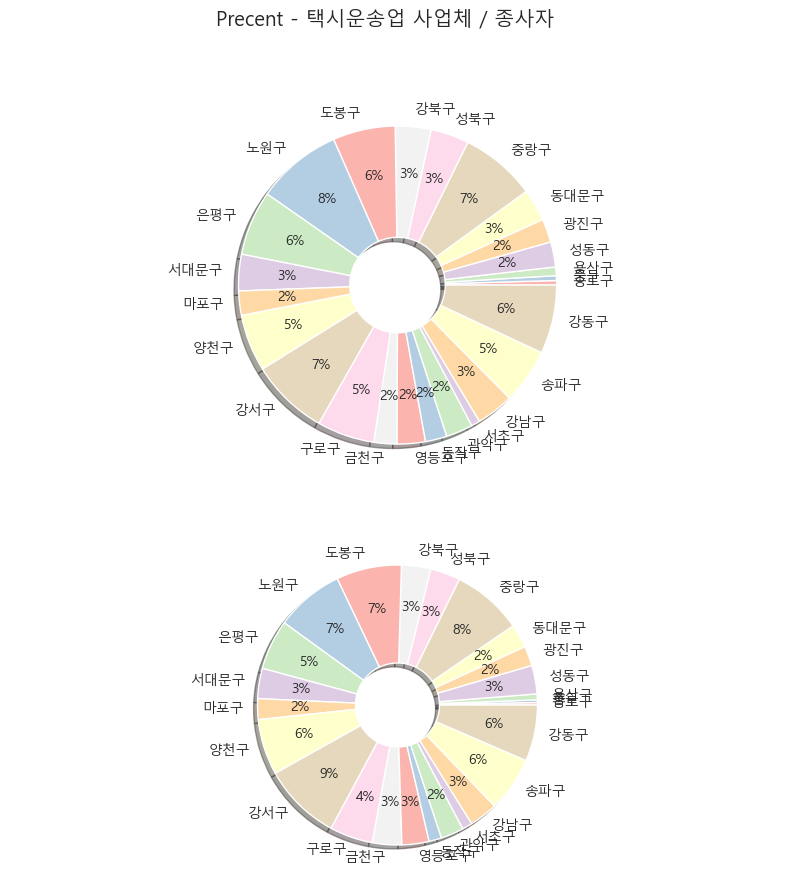

In [27]:
# Precent - 택시운송업 사업체 / 종사자
def custom_autopct(pct):
  return ('%d%%' % pct) if pct > 2 else '' # 2프로 이상인 컬럼만 표시


# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 택시운송업 사업체 / 종사자")

ax1.pie(seoul_business_copy['택시운송업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['택시운송업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

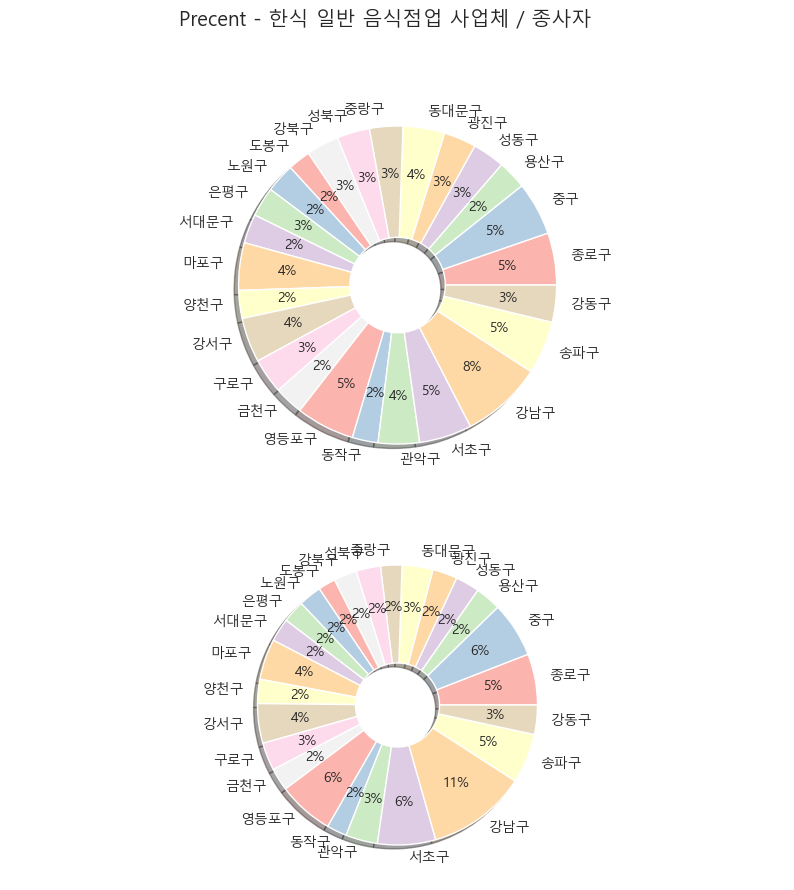

In [28]:
# Precent - 한식 일반 음식점업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 한식 일반 음식점업 사업체 / 종사자")

ax1.pie(seoul_business_copy['한식 일반 음식점업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['한식 일반 음식점업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

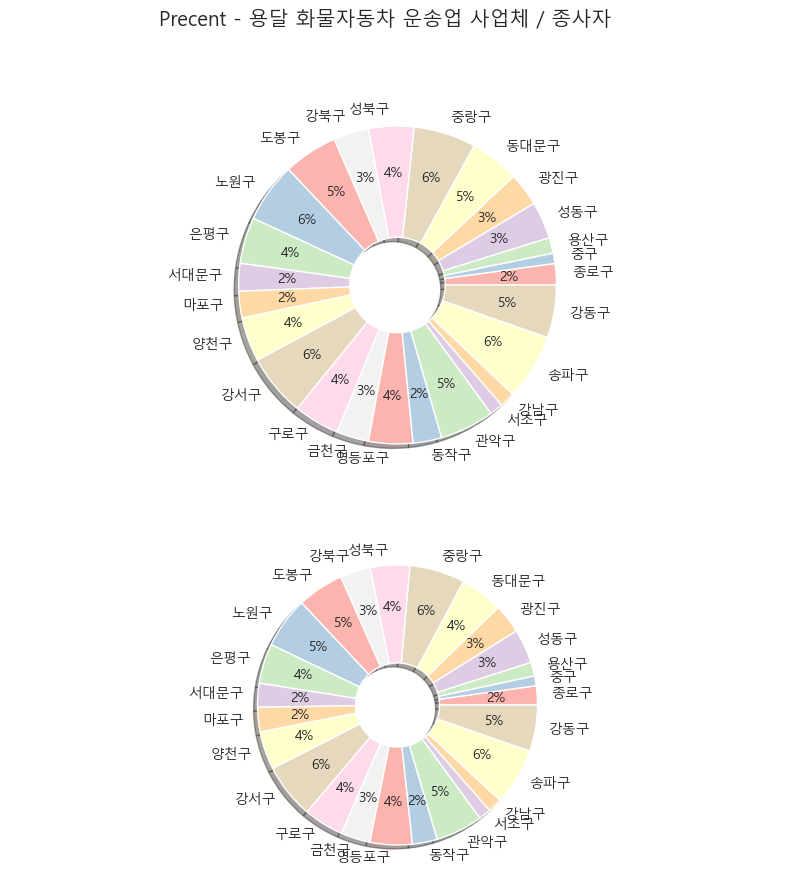

In [29]:
# Precent - 용달 화물자동차 운송업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 용달 화물자동차 운송업 사업체 / 종사자")

ax1.pie(seoul_business_copy['용달 화물자동차 운송업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['용달 화물자동차 운송업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

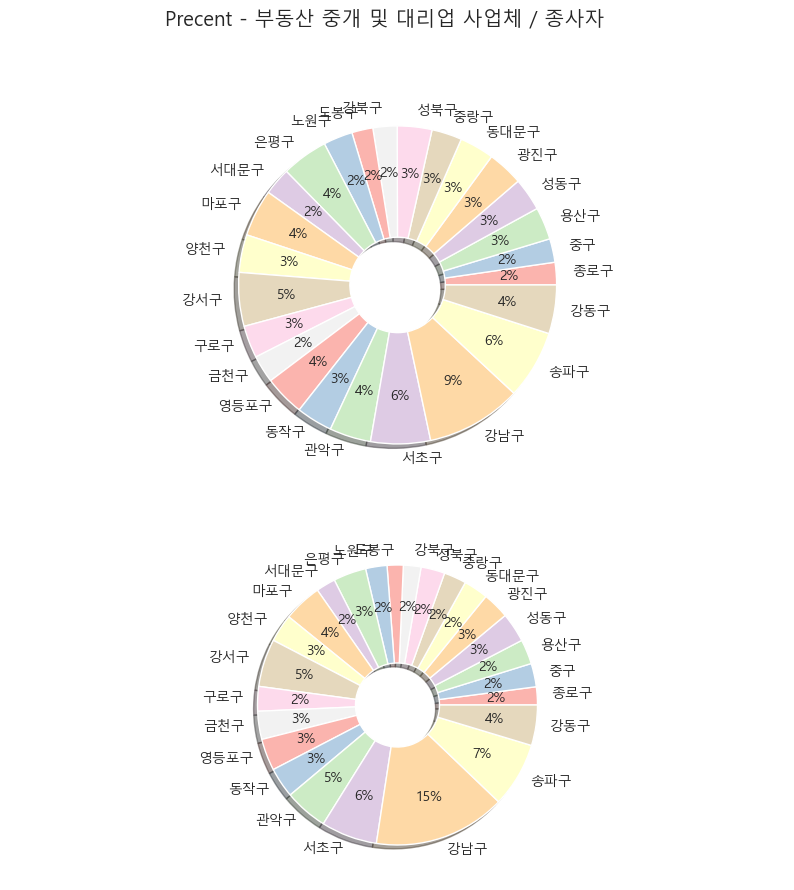

In [30]:
# Precent - 부동산 중개 및 대리업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 부동산 중개 및 대리업 사업체 / 종사자")

ax1.pie(seoul_business_copy['부동산 중개 및 대리업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['부동산 중개 및 대리업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

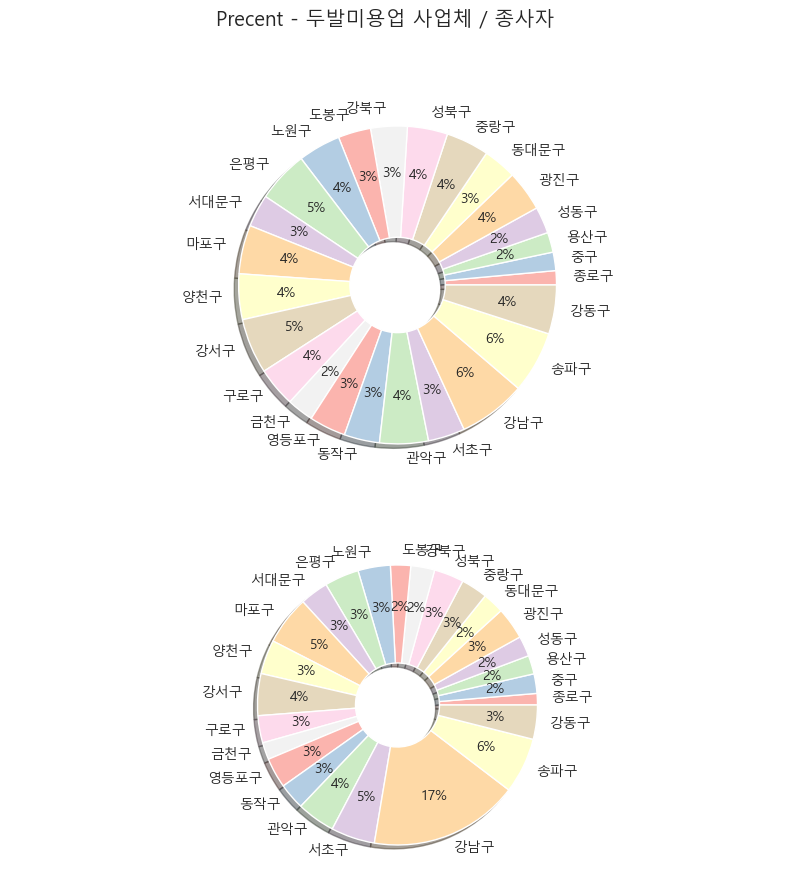

In [31]:
# Precent - 두발미용업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 두발미용업 사업체 / 종사자")

ax1.pie(seoul_business_copy['두발미용업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['두발미용업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

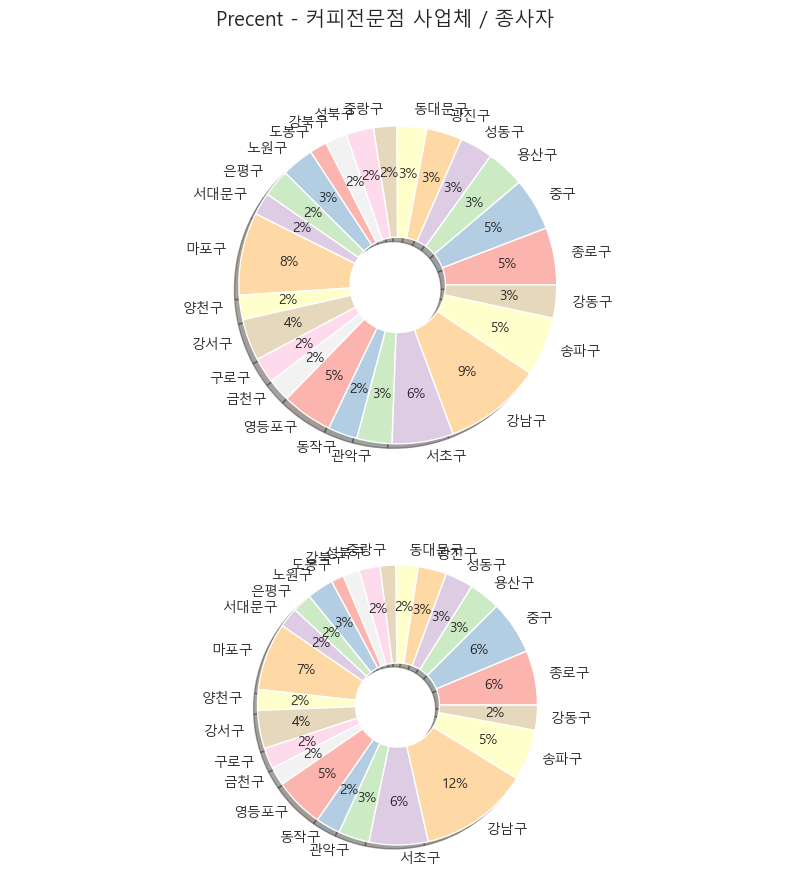

In [32]:
# Precent - 커피전문점 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 커피전문점 사업체 / 종사자")

ax1.pie(seoul_business_copy['커피전문점 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['커피전문점 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

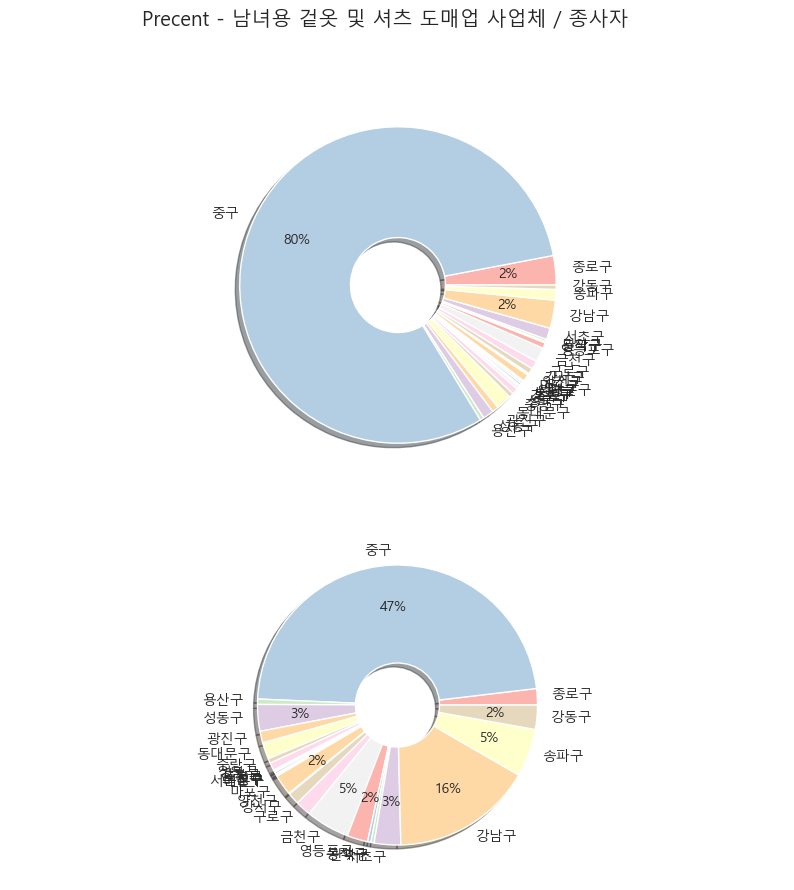

In [33]:
# Precent - 남녀용 겉옷 및 셔츠 도매업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 남녀용 겉옷 및 셔츠 도매업 사업체 / 종사자")

ax1.pie(seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['남녀용 겉옷 및 셔츠 도매업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

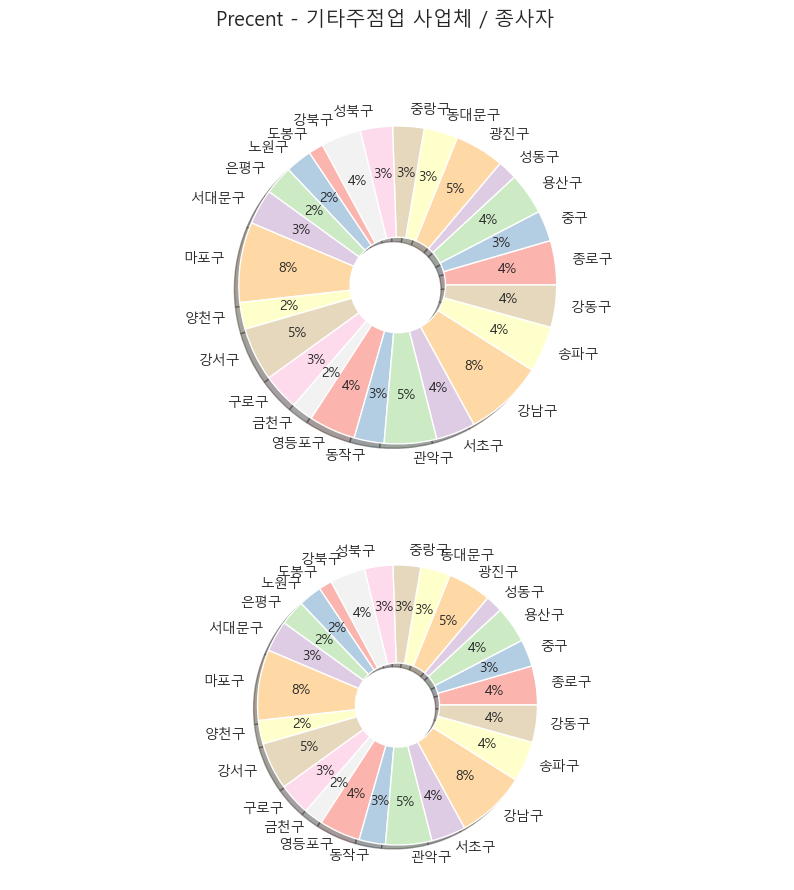

In [34]:
# Precent - 기타주점업 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 기타주점업 사업체 / 종사자")

ax1.pie(seoul_business_copy['기타주점업 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['기타주점업 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

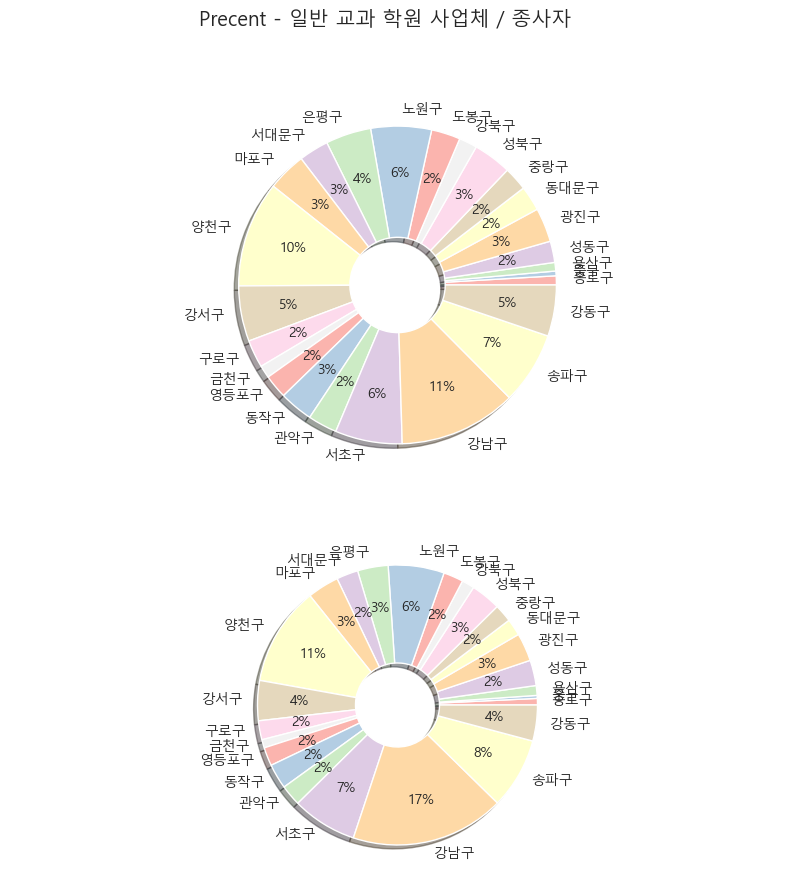

In [35]:
# Precent - 일반 교과 학원 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 일반 교과 학원 사업체 / 종사자")

ax1.pie(seoul_business_copy['일반 교과 학원 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['일반 교과 학원 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

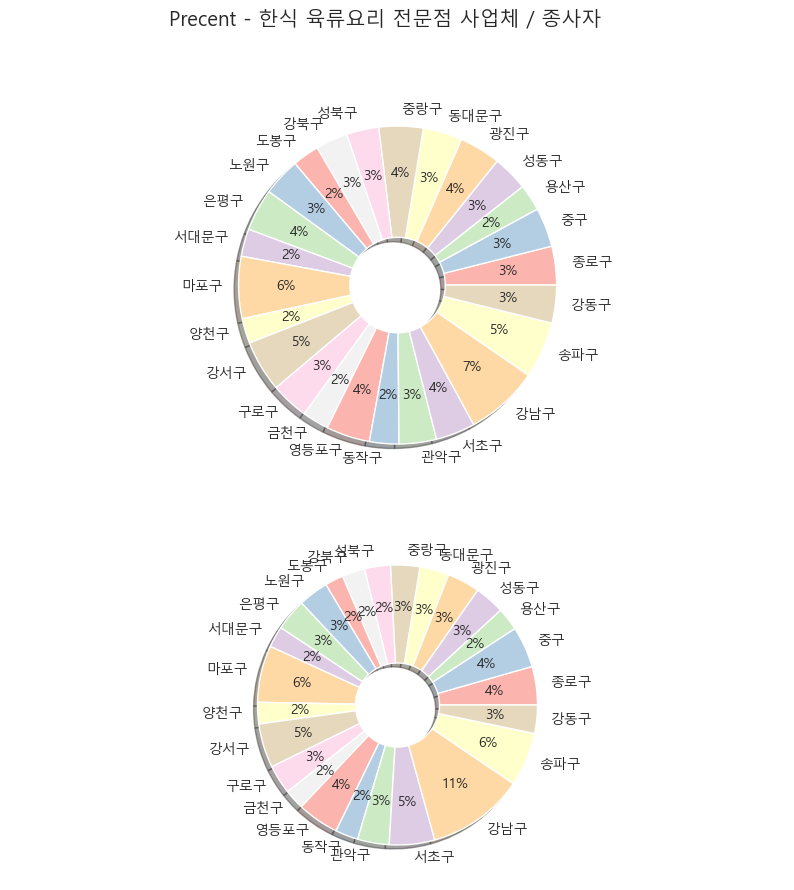

In [36]:
# Precent - 한식 육류요리 전문점 사업체 / 종사자

# 사업체
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 10)
fig.suptitle("Precent - 한식 육류요리 전문점 사업체 / 종사자")

ax1.pie(seoul_business_copy['한식 육류요리 전문점 - 사업체'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')

# 종사자
ax2.pie(seoul_business_copy['한식 육류요리 전문점 - 종사자'],
        labels=seoul_business_copy['자치구'],
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel1',len(seoul_business_copy['자치구'])),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':10})
ax1.axis('equal')
plt.show()

In [37]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2. 
# 3. 

---